In [1]:
from  scipy.special import j1
from kSZ_forecast_general_func import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
Grid = 512
MAS  = "NGP"
Snapshot = 1631

snap_info=Snap_Info()

Thelen = Boxlen/h/cosmo.comoving_distance(z=snap_info.get_redshift(Snapshot)).value
cnorm=ne0*sigma_t*Mpc2m*Boxlen*1.0/Grid*(1+snap_info.get_redshift(Snapshot))**2/h

the_los=(45)*np.pi/180
n_rsd=np.array([np.cos(the_los),np.sin(the_los),0])

# copare randomly generatrly CMB sky

In [10]:
cmb_map_test = np.zeros((Grid, Grid, 14))
for i in range(14):
    cmb_map_test[:,:,i] = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[0][0],sigma=cmbsur[0][1])

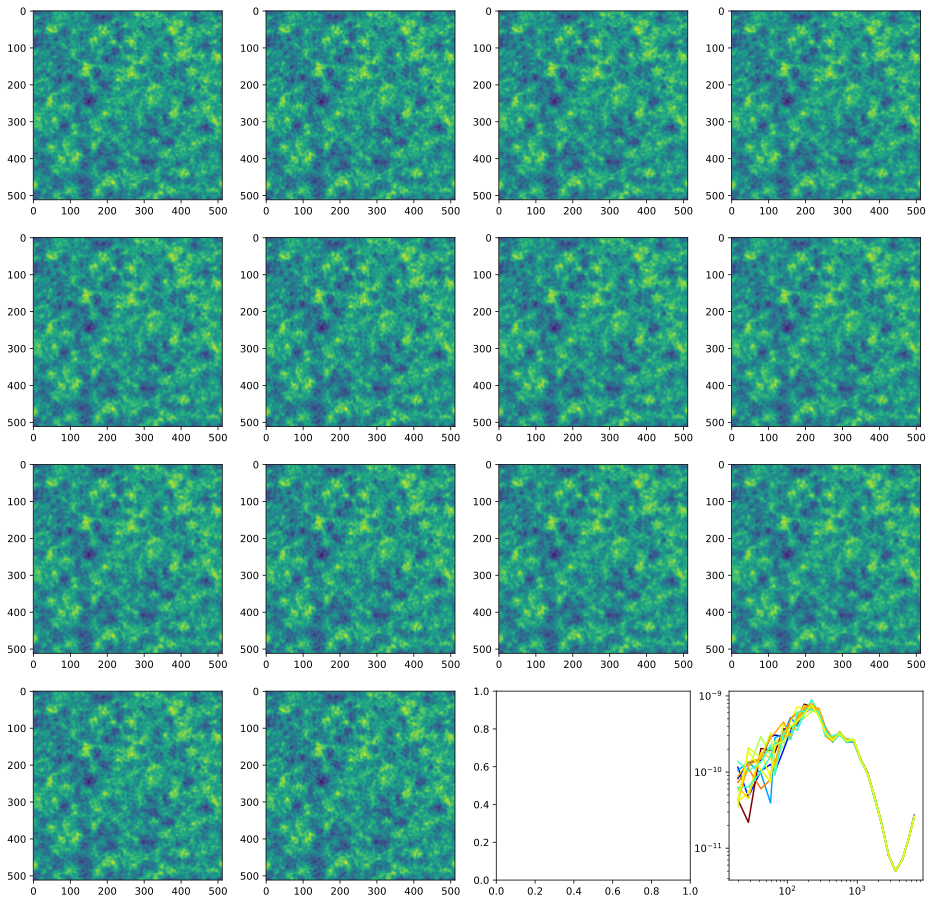

In [33]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
jet = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=3, vmax=7)
scalarmap=cmx.ScalarMappable(norm=cNorm, cmap=jet)

fig, ax = plt.subplots(4, 4, figsize = (4*4, 4*4))
ax=ax.flatten()
for i in range(14):
    colorVal = scalarmap.to_rgba(SN[i])
    cl, l = fa.CalPS2d(cmb_map_test[:,:,i], grid=Grid,mapscale=(Thelen/Grid**2)**2, kscale=2*np.pi/Thelen)
    ax[-1].plot(l,cl*l**2/2/np.pi, c=colorVal, label = str(i))
    ax[i].imshow(cmb_map_act)
    

    
ax[-1].set_xscale("log")
ax[-1].set_yscale("log")

# check for cmb sky

In [11]:
Den_dir= "/home/chenzy/data/denmap/den"+MAS+"_"+str(Grid)+"_"+str(Snapshot)+"_0"
Mom_dir = "/home/chenzy/data/mommap/mom"+MAS+"_"+str(Grid)+"_"+str(Snapshot)+"_0"
momp=snap_info.get_vel_norm(Snapshot)*np.fromfile(Mom_dir, dtype=np.float32, count=3*Grid**3, sep="").reshape(Grid,Grid,Grid,3)
denp=np.fromfile(Den_dir, dtype=np.float32, count=Grid**3, sep="").reshape((Grid,)*3)
velp = momden2vel(denp, momp)
momp = (denp-1).reshape(Grid, Grid, Grid,1)*velp
momp_proj=proj1(momp,the)*cnorm

In [12]:
the=(45)*np.pi/180
n_rsd=np.array([np.cos(the),np.sin(the),0])
momp_proj=proj1(momp,the)*cnorm

In [5]:
cmb_map_planck = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[1][0],sigma=cmbsur[1][1])
cmb_map_act = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[0][0],sigma=cmbsur[0][1])
cmb_map_ = cmb2d(thelen=Thelen, grid = Grid)

Text(0.5, 1.0, 'CMB ACT')

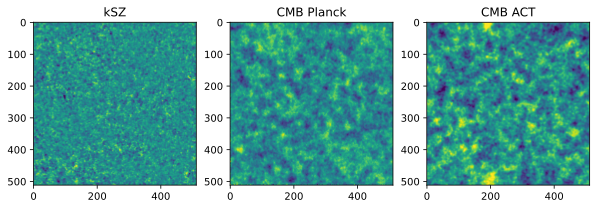

In [40]:
fig, ax = plt.subplots(1, 3, figsize = (10, 3))
ax[0].imshow(momp_proj, vmin=-3*np.std(momp_proj), vmax=3*np.std(momp_proj))
ax[1].imshow(cmb_map_planck, vmin=-.02*np.std(cmb_map_planck), vmax=.02*np.std(cmb_map_planck))
ax[2].imshow(cmb_map_act, vmin=-3*np.std(cmb_map_act), vmax=3*np.std(cmb_map_act))
ax[0].set_title("kSZ")
ax[1].set_title("CMB Planck")
ax[2].set_title("CMB ACT")

In [ ]:
fig, ax = plt.subplots()
cl, l = fa.CalPS2d(momp_proj,grid=Grid,mapscale=(Thelen/Grid**2)**2, kscale=2*np.pi/Thelen)
ax.plot(l,cl*l**2/2/np.pi, label = "kSZ z:1.65-2.45")
cl, l = fa.CalPS2d(cmb_map_planck,grid=Grid,mapscale=(Thelen/Grid**2)**2, kscale=2*np.pi/Thelen)
ax.plot(l,cl*l**2/2/np.pi, label = "CMB_Planck")
cl, l = fa.CalPS2d(cmb_map_act,grid=Grid,mapscale=(Thelen/Grid**2)**2, kscale=2*np.pi/Thelen)
ax.plot(l,cl*l**2/2/np.pi, label = "CMB_ACT")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("l")
ax.set_ylabel("cl*l**2/2/np.pi")
ax.legend()
ax.set_ylim(10**-15, 10**-9)

# stack

In [2]:
Den_dir= "/home/chenzy/data/denmap/den"+MAS+"_"+str(Grid)+"_"+str(Snapshot)+"_0"
Mom_dir = "/home/chenzy/data/mommap/mom"+MAS+"_"+str(Grid)+"_"+str(Snapshot)+"_0"
momp=snap_info.get_vel_norm(Snapshot)*np.fromfile(Mom_dir, dtype=np.float32, count=3*Grid**3, sep="").reshape(Grid,Grid,Grid,3)
denp=np.fromfile(Den_dir, dtype=np.float32, count=Grid**3, sep="").reshape((Grid,)*3)
velp = momden2vel(denp, momp)
momp = (denp-1).reshape(Grid, Grid, Grid,1)*velp
momp_proj=proj1(momp,the_los)*cnorm

In [3]:
halox,halov, mh =ReadHalos_np(zstep=Snapshot)
halo_mass = mh*pm
N = int(4*10**-4*Boxlen**3)
label = np.where(halo_mass>10**13)[0]
np.random.shuffle(label)
print(len(label), len(label)/Boxlen**3)
#label = label[:N]
#len(label), N

88401 5.1157986111111114e-05


In [4]:
(Thelen/np.pi*180)**2

array([335.32180966])

In [5]:
#del velp, denp, momp
haloxx_rsd=add_RSD(halox[label,:]*Boxlen,halov[label,:]*(1+snap_info.get_redshift(Snapshot)),n_rsd,cosmo.H(snap_info.get_redshift(Snapshot)).value)%Boxlen   #Mpc/h
denh_rsd=den_NGP(haloxx_rsd,Grid)
thetap = vel2theta(velp, Boxlen)
W,kx,ky,kz=wiener_filter_theta_esti(denh_rsd,thetap, Boxlen)
#del thetap
thetah_rsd_rec=wiener_filter_den2theta(denh_rsd,W,kx,ky,kz, Boxlen)
#del W,kx,ky,kz
velh_rsd_rec=theta2vel(thetah_rsd_rec, Boxlen)

/home/chenzy/code/kSZ_forecast/kSZ_forecast_general_func.py:217: RuntimeWarning: invalid value encountered in true_divide
  W=cor_the_delta_f[0]/ps_delta[0]


## jackknife test

In [8]:
def cal_stack_kSZ_signal_proj1_jk(the_ap, CMB_map, vel_rec, halox, halov, the_los, N_jk, thelen, grid,):
    '''
    vel_rec: (grid, grid, grid, 3), simu coor
    halox: (N, 3), simu coor
    halov: (N, 3), simu coor, only for rv
    the_los:
    '''
    Nh = len(halov[:,0])
    stack_signal = np.zeros((len(the_ap), N_jk))
    stack_null = np.zeros((len(the_ap), N_jk))

    #vec_rec_los
    vx = interpn((np.arange(grid),np.arange(grid),np.arange(grid)), vel_rec[:,:,:,0], halox*grid, bounds_error=0, fill_value=0)
    vy = interpn((np.arange(grid),np.arange(grid),np.arange(grid)), vel_rec[:,:,:,1], halox*grid, bounds_error=0, fill_value=0)
    halov_rec_los = np.cos(the_los)*vx+np.sin(the_los)*vy

    halov_los = np.cos(the_los)*halov[:,0]+np.sin(the_los)*halov[:,1]
    r_true_rec = np.mean(halov_rec_los*halov_los)/np.std(halov_rec_los)/np.std(halov_los)
    del halov_los, halov
    print("rv=",r_true_rec)

    #kSZ temp
    halox_new_rsd_coor = (proj1_halo_coor(halox,the_los)*grid)%grid
    #jk
    label_array = resample_jackknift(label=np.arange(len(halov_rec_los)), N_jk=N_jk)
    r_ksz_rec = np.zeros(len(the_ap))
    for i in range(len(the_ap)):
        CMB_ap_map = convel_map2d_AP(field2d=CMB_map, the_ap=the_ap[i], grid=grid, lscale=2*np.pi/thelen)
        kSZ_ap_halo = interpn((np.arange(grid), np.arange(grid)), CMB_ap_map, (halox_new_rsd_coor[:,1], halox_new_rsd_coor[:, 2]), bounds_error=0, fill_value=0)
        r_ksz_rec[i] = np.mean(halov_rec_los*kSZ_ap_halo)/np.std(halov_rec_los)/np.std(kSZ_ap_halo)
        #print("r:",r_ksz_rec[i])
        
        for j in tqdm(range(N_jk)):
            #muK
            stack_signal[i,j] = np.sum(kSZ_ap_halo[label_array[:,j]]*halov_rec_los[label_array[:,j]])/np.sum(halov_rec_los[label_array[:,j]]**2)*np.std(halov_rec_los[label_array[:,j]])*np.pi*the_ap[i]**2*10**6/r_true_rec
            T_random = kSZ_ap_halo[label_array[:,j]]
            np.random.shuffle(T_random)
            stack_null[i,j] = np.sum(T_random*halov_rec_los[label_array[:,j]])/np.sum(halov_rec_los[label_array[:,j]]**2)*np.std(halov_rec_los[label_array[:,j]])*np.pi*the_ap[i]**2*10**6/r_true_rec

    return stack_signal, stack_null, r_true_rec, r_ksz_rec



import warnings
warnings.filterwarnings("ignore")


#cmb_map_ = cmb2d(thelen=Thelen, grid = Grid)
##cmb_map_planck = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[1][0],sigma=cmbsur[1][1])
cmb_map_act = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[0][0],sigma=cmbsur[0][1])
title = "only kSZ"
N_jk = 50
the_ap = np.linspace(1, 6, 10)
label = np.where(halo_mass>10**13)[0]
print(len(label))

SN = np.zeros(50)
for kk in range(50):
    cmb_map_act = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[0][0],sigma=cmbsur[0][1])
    stack_signal, stack_null, r1, r2 = cal_stack_kSZ_signal_proj1_jk(the_ap = the_ap, CMB_map = momp_proj+cmb_map_act, vel_rec=velh_rsd_rec, halox=halox[label,:], halov=halov[label, :], the_los=the_los, N_jk=N_jk, thelen=Thelen, grid = Grid)
    stack_mean, corv = error_esti_jackknife(stack_signal)
    C_ = pseudo_inverse(corv,2)
    chi_null = cal_chi_square(stack_mean, stack_mean, C_)
    sigma = np.zeros(len(the_ap))
    for i in range(len(the_ap)):
        sigma[i] = np.sqrt((N_jk-1)/N_jk*np.sum((stack_signal[i,:]-np.mean(stack_signal[i,:]))**2))
    #plt.figure()
    #plt.plot(the_ap,stack_signal, "k", alpha = 0.1)
    #plt.errorbar(the_ap, np.mean(stack_signal, axis=1), yerr=np.sqrt(np.diag(corv)))
    #plt.yscale("log")
    #plt.xlabel(r"$\theta_{\rm AP}$ [arcmin]", fontsize=20)
    #plt.ylabel(r"$T_{\rm kSZ} [\mu K arcmin^2]$", fontsize=20)
    #plt.title(title+" S/N_null = "+str(np.round(np.sqrt(chi_null), 2)), fontsize=20)
    print("S/N=", np.sqrt(chi_null))
    SN[kk] = np.sqrt(chi_null)
    


88401
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 175.80it/s]


S/N= 5.377667752344611
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 199.99it/s]


S/N= 3.869997267311531
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 199.09it/s]


S/N= 4.631675840895627
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 199.67it/s]


S/N= 5.695380809541532
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 186.56it/s]


S/N= 6.329327340476078
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 169.50it/s]


S/N= 5.769142355891088
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 206.21it/s]


S/N= 5.448857639903841
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 207.88it/s]


S/N= 4.350031061163114
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 199.81it/s]


S/N= 4.919271324856724
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 205.03it/s]


S/N= 6.970116566449534
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 176.12it/s]


S/N= 5.5701873144332605
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 194.71it/s]


S/N= 3.8192265267602084
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 185.17it/s]


S/N= 4.924149834770727
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 178.93it/s]


S/N= 3.808109456500097
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 199.75it/s]


S/N= 4.170357018954233
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 198.80it/s]


S/N= 5.583236675909072
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 179.13it/s]


S/N= 5.50688894228887
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 193.17it/s]


S/N= 5.680852004011399
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 199.10it/s]


S/N= 3.4509312588451646
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 201.18it/s]


S/N= 5.430699380477744
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 191.79it/s]


S/N= 5.325733393299299
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 192.94it/s]


S/N= 7.768619205445712
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 192.08it/s]


S/N= 4.7363951313888
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 180.63it/s]


S/N= 2.7799273680299996
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 177.11it/s]


S/N= 3.7470430523829914
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 173.14it/s]


S/N= 2.9561032032310774
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 191.74it/s]


S/N= 5.140765376964213
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 189.26it/s]


S/N= 2.981206985422178
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 199.29it/s]


S/N= 4.4902497953228355
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 196.28it/s]


S/N= 7.132978608224193
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 206.65it/s]


S/N= 5.576214837134619
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 206.61it/s]


S/N= 5.19195395313687
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 185.61it/s]


S/N= 4.083774670554822
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 210.16it/s]


S/N= 6.618777294397505
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 207.61it/s]


S/N= 5.908744604791938
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 193.99it/s]


S/N= 4.1810360805454385
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 195.86it/s]


S/N= 3.5434755093154204
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 200.79it/s]


S/N= 5.751537426652386
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 193.53it/s]


S/N= 4.963384614611491
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 200.12it/s]


S/N= 3.157996005821443
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 179.30it/s]


S/N= 4.964298673528214
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 199.33it/s]


S/N= 4.421811939227964
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 179.33it/s]


S/N= 5.264438036648845
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 198.73it/s]


S/N= 5.599949538683694
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 194.77it/s]


S/N= 5.479098157740201
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 202.05it/s]


S/N= 5.805879373192992
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 200.86it/s]


S/N= 5.193934369449356
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 192.71it/s]


S/N= 4.996102255495507
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 208.34it/s]


S/N= 3.8535141446411263
rv= 0.8460514970686072


100%|██████████| 50/50 [00:00<00:00, 201.63it/s]

S/N= 3.8100746662927065


Text(0.5, 0, 'realization of CMB map')

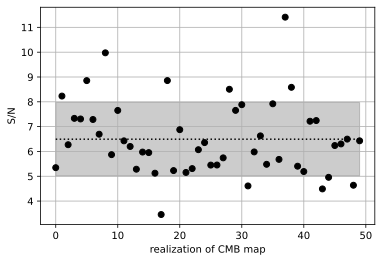

In [7]:
plt.plot(SN,'ok') 
plt.plot(range(len(SN)), np.mean(SN)*np.ones(len(SN)), ":k")
plt.fill_between(range(len(SN)), np.mean(SN)*np.ones(len(SN))-np.std(SN)*np.ones(len(SN)), np.mean(SN)*np.ones(len(SN))+np.std(SN)*np.ones(len(SN)), alpha=0.2, color = "k")
plt.grid()
plt.ylabel("S/N")
plt.xlabel("realization of CMB map")

## not jackknife

In [39]:
def cal_stack_kSZ_signal_proj1_diff_map(the_ap, kSZ_map, CMB_survey, vel_rec, halox, halov, the_los, N_re, thelen, grid,):
    '''
    vel_rec: (grid, grid, grid, 3), simu coor
    halox: (N, 3), simu coor
    halov: (N, 3), simu coor, only for rv
    the_los:
    '''
    if CMB_survey == "Planck":
        ss = 1
    elif CMB_survey == "ACT":
        ss = 0
        
    Nh = len(halov[:,0])
    stack_signal = np.zeros((len(the_ap), N_re))
    stack_null = np.zeros((len(the_ap), N_re))

    #vec_rec_los
    vx = interpn((np.arange(grid),np.arange(grid),np.arange(grid)), vel_rec[:,:,:,0], halox*grid, bounds_error=0, fill_value=0)
    vy = interpn((np.arange(grid),np.arange(grid),np.arange(grid)), vel_rec[:,:,:,1], halox*grid, bounds_error=0, fill_value=0)
    halov_rec_los = np.cos(the_los)*vx+np.sin(the_los)*vy

    halov_los = np.cos(the_los)*halov[:,0]+np.sin(the_los)*halov[:,1]
    r_true_rec = np.mean(halov_rec_los*halov_los)/np.std(halov_rec_los)/np.std(halov_los)
    del halov_los, halov
    print("rv=",r_true_rec)

    #kSZ temp
    halox_new_rsd_coor = (proj1_halo_coor(halox,the_los)*grid)%grid
    #jk
    #label_array = resample_jackknift(label=np.arange(len(halov_rec_los)), N_jk=N_jk)
    r_ksz_rec = np.zeros(len(the_ap))
    
    for j in tqdm(range(N_re)):
        CMB_map = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[ss][0],sigma=cmbsur[ss][1])
        for i in range(len(the_ap)):
            CMB_ap_map = convel_map2d_AP(field2d=kSZ_map + CMB_map, the_ap=the_ap[i], grid=grid, lscale=2*np.pi/thelen)
            #kSZ_ap_halo = halov_rec_los
            kSZ_ap_halo = interpn((np.arange(grid), np.arange(grid)), CMB_ap_map, (halox_new_rsd_coor[:,1], halox_new_rsd_coor[:, 2]), bounds_error=0, fill_value=0)
            r_ksz_rec[i] = np.mean(halov_rec_los*kSZ_ap_halo)/np.std(halov_rec_los)/np.std(kSZ_ap_halo)
            
            stack_signal[i,j] = np.sum(kSZ_ap_halo*halov_rec_los)/np.sum(halov_rec_los**2)*np.std(halov_rec_los)*np.pi*the_ap[i]**2*10**6/r_true_rec
            #T_random = kSZ_ap_halo[label_array[:,j]]
            #np.random.shuffle(T_random)
            #stack_null[i,j] = np.sum(T_random*halov_rec_los[label_array[:,j]])/np.sum(halov_rec_los[label_array[:,j]]**2)*np.std(halov_rec_los[label_array[:,j]])*np.pi*the_ap[i]**2*10**6/r_true_rec

    return stack_signal, stack_null, r_true_rec, r_ksz_rec

def error_esti(samples):
#samples.shape=(r_bin,N_bin)
    r_bin=samples.shape[0]
    N_bin=samples.shape[1]
    s_mean=np.mean(samples,axis=1)
    corv=np.zeros((r_bin,r_bin))
    for ii in range(r_bin):
        for jj in range(r_bin):
            for kk in range(N_bin):
                corv[ii,jj]+=(samples[ii,kk]-s_mean[ii])*(samples[jj,kk]-s_mean[jj])
    corv*=1/N_bin
    #esti=(N_bin-r_bin-1.)/(N_bin-1)*np.linalg.inv(corv)
    #print("esti:\n",esti)
    return s_mean,corv

import warnings
warnings.filterwarnings("ignore")


#cmb_map_ = cmb2d(thelen=Thelen, grid = Grid)
##cmb_map_planck = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[1][0],sigma=cmbsur[1][1])
cmb_map_act = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[0][0],sigma=cmbsur[0][1])
title = "only kSZ"
N_re = 10
the_ap = np.linspace(1, 6, 10)
label = np.where(halo_mass>10**13)[0]
print(len(label))


SN = np.zeros(50)
for kk in range(50):
    cmb_map_act = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[0][0],sigma=cmbsur[0][1])
    stack_signal, stack_null, r1, r2 = cal_stack_kSZ_signal_proj1_diff_map(the_ap = the_ap, kSZ_map = momp_proj, CMB_survey="ACT", vel_rec=velh_rsd_rec, halox=halox[label,:], halov=halov[label, :], the_los=the_los, N_re=N_re, thelen=Thelen, grid = Grid)
    stack_mean, corv = error_esti(stack_signal)
    C_ = pseudo_inverse(corv,2)
    chi_null = cal_chi_square(stack_mean, stack_mean, C_)
    sigma = np.zeros(len(the_ap))
    for i in range(len(the_ap)):
        sigma[i] = np.sqrt((N_jk-1)/N_jk*np.sum((stack_signal[i,:]-np.mean(stack_signal[i,:]))**2))
    #plt.figure()
    #plt.plot(the_ap,stack_signal, "k", alpha = 0.1)
    #plt.errorbar(the_ap, np.mean(stack_signal, axis=1), yerr=np.sqrt(np.diag(corv)))
    #plt.yscale("log")
    #plt.xlabel(r"$\theta_{\rm AP}$ [arcmin]", fontsize=20)
    #plt.ylabel(r"$T_{\rm kSZ} [\mu K arcmin^2]$", fontsize=20)
    #plt.title(title+" S/N_null = "+str(np.round(np.sqrt(chi_null), 2)), fontsize=20)
    print("S/N=", np.sqrt(chi_null))
    SN[kk] = np.sqrt(chi_null)
    #break
    


88401
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.99s/it]


S/N= 6.614657954821706
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.88s/it]


S/N= 16.957710467995255
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.84s/it]


S/N= 7.50961536838494
rv= 0.8460514970686072


100%|██████████| 10/10 [00:37<00:00,  3.77s/it]


S/N= 6.81010512747703
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.87s/it]


S/N= 6.5475357234843505
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.84s/it]


S/N= 5.770231850586828
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.89s/it]


S/N= 30.1839664093513
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.86s/it]


S/N= 16.540136055509542
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.93s/it]


S/N= 10.642763911125675
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.91s/it]


S/N= 33.62139851577623
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.86s/it]


S/N= 21.31958895624333
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.89s/it]


S/N= 6.317531727402981
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.90s/it]


S/N= 12.588978037731952
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.86s/it]


S/N= 7.021023572706543
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.91s/it]


S/N= 10.528939889536108
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.84s/it]


S/N= 12.729323925358122
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.90s/it]


S/N= 5.007082239846625
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.89s/it]


S/N= 4.1874860935628035
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.83s/it]


S/N= 6.899625671027744
rv= 0.8460514970686072


100%|██████████| 10/10 [00:40<00:00,  4.00s/it]


S/N= 11.093815672192319
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.95s/it]


S/N= 5.961792360621323
rv= 0.8460514970686072


100%|██████████| 10/10 [00:37<00:00,  3.78s/it]


S/N= 15.144001058769025
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.85s/it]


S/N= 6.966623559742714
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.98s/it]


S/N= 9.716984037215706
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.85s/it]


S/N= 81.66756669018655
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.91s/it]


S/N= 7.863792094402332
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.90s/it]


S/N= 7.220194605956523
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.94s/it]


S/N= 6.004693930059855
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.89s/it]


S/N= 4.8880835542678485
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.89s/it]


S/N= 24.553988351167746
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.84s/it]


S/N= 7.850077970484712
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.88s/it]


S/N= 11.18689318546
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.81s/it]


S/N= 9.448894397869086
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.90s/it]


S/N= 3.959088317949035
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.91s/it]


S/N= 9.397008804193845
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.82s/it]


S/N= 6.508460373045327
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.81s/it]


S/N= 5.4565793408143275
rv= 0.8460514970686072


100%|██████████| 10/10 [00:37<00:00,  3.78s/it]


S/N= 5.700018529178174
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.89s/it]


S/N= 17.82444120161604
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.87s/it]


S/N= 13.80520849210981
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.90s/it]


S/N= 9.02179701389939
rv= 0.8460514970686072


100%|██████████| 10/10 [00:37<00:00,  3.80s/it]


S/N= 10.793647545768737
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.83s/it]


S/N= 5.011300412699716
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.93s/it]


S/N= 8.30672187078119
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.94s/it]


S/N= 8.139130389542343
rv= 0.8460514970686072


100%|██████████| 10/10 [00:38<00:00,  3.89s/it]


S/N= 135.90606736385573
rv= 0.8460514970686072


100%|██████████| 10/10 [00:40<00:00,  4.06s/it]


S/N= 6.145556279504484
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.90s/it]


S/N= 10.753914237817645
rv= 0.8460514970686072


100%|██████████| 10/10 [00:39<00:00,  3.96s/it]


S/N= 11.934794833753923
rv= 0.8460514970686072


100%|██████████| 10/10 [00:37<00:00,  3.79s/it]

S/N= 8.099342003793726


Text(0.5, 0, 'realization')

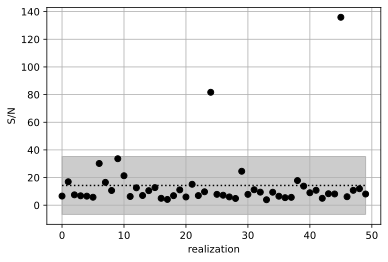

In [40]:
plt.plot(SN,'ok') 
plt.plot(range(len(SN)), np.mean(SN)*np.ones(len(SN)), ":k")
plt.fill_between(range(len(SN)), np.mean(SN)*np.ones(len(SN))-np.std(SN)*np.ones(len(SN)), np.mean(SN)*np.ones(len(SN))+np.std(SN)*np.ones(len(SN)), alpha=0.2, color = "k")
plt.grid()
plt.ylabel("S/N")
plt.xlabel("realization")

605083
rv= 0.7734021987362535
r: 0.08128857786790256


100%|██████████| 100/100 [00:09<00:00, 10.99it/s]


r: 0.08806871571944223


100%|██████████| 100/100 [00:08<00:00, 11.55it/s]


r: 0.0957021691000357


100%|██████████| 100/100 [00:08<00:00, 11.45it/s]


r: 0.10044598149130389


100%|██████████| 100/100 [00:08<00:00, 11.70it/s]


r: 0.09920674001595904


100%|██████████| 100/100 [00:08<00:00, 12.09it/s]


r: 0.09342303888599421


100%|██████████| 100/100 [00:08<00:00, 12.43it/s]


r: 0.08663014440514925


100%|██████████| 100/100 [00:07<00:00, 12.80it/s]


r: 0.0805024062623658


100%|██████████| 100/100 [00:08<00:00, 11.43it/s]


r: 0.07519545392828535


100%|██████████| 100/100 [00:08<00:00, 11.61it/s]


r: 0.07063387764581362


100%|██████████| 100/100 [00:08<00:00, 11.98it/s]


8588.735719215043 92.67543212316328


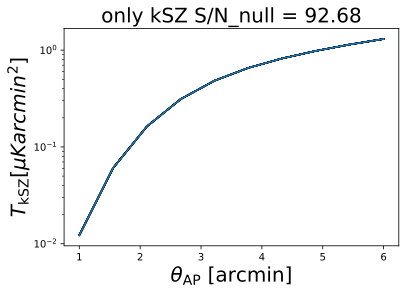

In [8]:
import warnings
warnings.filterwarnings("ignore")



#cmb_map_ = cmb2d(thelen=Thelen, grid = Grid)
##cmb_map_planck = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[1][0],sigma=cmbsur[1][1])
#cmb_map_act = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[0][0],sigma=cmbsur[0][1])
title = "only kSZ"
N_jk = 100
the_ap = np.linspace(1, 6, 10)
label = np.where(halo_mass>10**12.5)[0]
print(len(label))
stack_signal, stack_null = cal_stack_kSZ_signal_proj1_jk(the_ap = the_ap, CMB_map = momp_proj, vel_rec=velh_rsd_rec, halox=halox[label,:], halov=halov[label, :], the_los=the, N_jk=N_jk, thelen=Thelen, grid = Grid)
stack_mean, corv = error_esti_jackknife(stack_signal)
C_ = pseudo_inverse(corv,2)
chi_null = cal_chi_square(stack_mean, stack_mean, C_)
sigma = np.zeros(len(the_ap))
for i in range(len(the_ap)):
    sigma[i] = np.sqrt((N_jk-1)/N_jk*np.sum((stack_signal[i,:]-np.mean(stack_signal[i,:]))**2))

plt.plot(the_ap,stack_signal, "k", alpha = 0.1)
plt.errorbar(the_ap, np.mean(stack_signal, axis=1), yerr=np.sqrt(np.diag(corv)))
plt.yscale("log")
plt.xlabel(r"$\theta_{\rm AP}$ [arcmin]", fontsize=20)
plt.ylabel(r"$T_{\rm kSZ} [\mu K arcmin^2]$", fontsize=20)
plt.title(title+" S/N_null = "+str(np.round(np.sqrt(chi_null), 2)), fontsize=20)
print(chi_null, np.sqrt(chi_null))

605083
rv= 0.7734021987362535
r: 0.007193876442326084


100%|██████████| 100/100 [00:13<00:00,  7.58it/s]


r: 0.007611225720650504


100%|██████████| 100/100 [00:08<00:00, 11.91it/s]


r: 0.0076759556822054925


100%|██████████| 100/100 [00:07<00:00, 13.15it/s]


r: 0.007239857355840217


100%|██████████| 100/100 [00:07<00:00, 13.54it/s]


r: 0.006553583681436315


100%|██████████| 100/100 [00:07<00:00, 13.31it/s]


r: 0.00584584327023279


100%|██████████| 100/100 [00:07<00:00, 13.37it/s]


r: 0.005205492437211497


100%|██████████| 100/100 [00:12<00:00,  8.16it/s]


r: 0.004683622169150255


100%|██████████| 100/100 [00:14<00:00,  6.92it/s]


r: 0.004327027591747639


100%|██████████| 100/100 [00:15<00:00,  6.32it/s]


r: 0.0041551415863942546


100%|██████████| 100/100 [00:15<00:00,  6.32it/s]


118.80907530715648 10.899957582814553


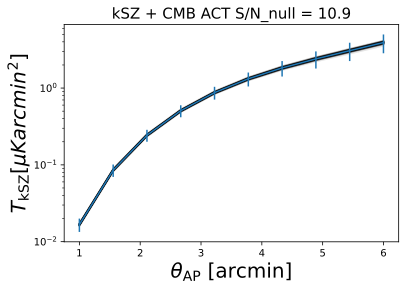

In [175]:
import warnings
warnings.filterwarnings("ignore")


def cal_stack_kSZ_signal_proj1_jk(the_ap, CMB_map, vel_rec, halox, halov, the_los, N_jk=50, thelen=Thelen, grid = Grid,):
    '''
    vel_rec: (grid, grid, grid, 3), simu coor
    halox: (N, 3), simu coor
    halov: (N, 3), simu coor, only for rv
    the_los:
    '''
    Nh = len(halov[:,0])
    stack_signal = np.zeros((len(the_ap), N_jk))
    stack_null = np.zeros((len(the_ap), N_jk))

    #vec_rec_los
    vx = interpn((np.arange(grid),np.arange(grid),np.arange(grid)), vel_rec[:,:,:,0], halox*Grid, bounds_error=0, fill_value=0)
    vy = interpn((np.arange(grid),np.arange(grid),np.arange(grid)), vel_rec[:,:,:,1], halox*Grid, bounds_error=0, fill_value=0)
    halov_rec_los = np.cos(the_los)*vx+np.sin(the_los)*vy

    halov_los = np.cos(the_los)*halov[:,0]+np.sin(the_los)*halov[:,1]
    r_true_rec = np.mean(halov_rec_los*halov_los)/np.std(halov_rec_los)/np.std(halov_los)
    del halov_los, halov
    print("rv=",r_true_rec)

    #kSZ temp
    halox_new_rsd_coor = (proj1_halo_coor(halox,the_los)*grid)%grid
    #jk
    label_array = resample_jackknift(label=np.arange(len(halov_rec_los)), N_jk=N_jk)
    for i in range(len(the_ap)):
        CMB_ap_map = convel_map2d_AP(field2d=CMB_map, the_ap=the_ap[i], grid=grid, lscale=2*np.pi/thelen)
        kSZ_ap_halo = interpn((np.arange(grid), np.arange(grid)), CMB_ap_map, (halox_new_rsd_coor[:,1], halox_new_rsd_coor[:, 2]), bounds_error=0, fill_value=0)
        r_ksz_rec = np.mean(halov_rec_los*kSZ_ap_halo)/np.std(halov_rec_los)/np.std(kSZ_ap_halo)
        print("r:",r_ksz_rec)
        
        for j in tqdm(range(N_jk)):
            #muK
            stack_signal[i,j] = np.sum(kSZ_ap_halo[label_array[:,j]]*halov_rec_los[label_array[:,j]])/np.sum(halov_rec_los[label_array[:,j]]**2)*np.std(halov_rec_los[label_array[:,j]])*np.pi*the_ap[i]**2*10**6/r_true_rec
            T_random = kSZ_ap_halo[label_array[:,j]]
            np.random.shuffle(T_random)
            stack_null[i,j] = np.sum(T_random*halov_rec_los[label_array[:,j]])/np.sum(halov_rec_los[label_array[:,j]]**2)*np.std(halov_rec_los[label_array[:,j]])*np.pi*the_ap[i]**2*10**6/r_true_rec

    return stack_signal, stack_null
#cmb_map_ = cmb2d(thelen=Thelen, grid = Grid)
##cmb_map_planck = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[1][0],sigma=cmbsur[1][1])
#cmb_map_act = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[0][0],sigma=cmbsur[0][1])
title = "kSZ + CMB ACT"
N_jk = 100
the_ap = np.linspace(1, 6, 10)
label = np.where(halo_mass>10**12.5)[0]
print(len(label))
stack_signal, stack_null = cal_stack_kSZ_signal_proj1_jk(the_ap = the_ap, CMB_map = momp_proj+cmb_map_act, vel_rec=velh_rsd_rec, halox=halox[label,:], halov=halov[label, :], the_los=the, N_jk=N_jk, thelen=Thelen, grid = Grid)
stack_mean, corv = error_esti_jackknife(stack_signal)
C_ = pseudo_inverse(corv,2)
chi_null = cal_chi_square(stack_mean, stack_mean, C_)
sigma = np.zeros(len(the_ap))
for i in range(len(the_ap)):
    sigma[i] = np.sqrt((N_jk-1)/N_jk*np.sum((stack_signal[i,:]-np.mean(stack_signal[i,:]))**2))

plt.plot(the_ap,stack_signal, "k", alpha = 0.1)
plt.errorbar(the_ap, np.mean(stack_signal, axis=1), yerr=np.sqrt(np.diag(corv)))
plt.yscale("log")
plt.xlabel(r"$\theta_{\rm AP}$ [arcmin]", fontsize=20)
plt.ylabel(r"$T_{\rm kSZ} [\mu K arcmin^2]$", fontsize=20)
plt.title(title+" S/N_null = "+str(np.round(np.sqrt(chi_null), 2)), fontsize=15)
print(chi_null, np.sqrt(chi_null))

In [146]:
np.diag(C_), corv

(array([6.09898761e+08, 7.51966217e+08, 7.47515047e+08, 3.48591969e+07,
        1.19230952e+09, 1.57369869e+09, 7.37163091e+08, 1.47392627e+08,
        1.11453169e+07, 1.88723913e+05]),
 array([[4.92372288e-05, 2.37340893e-04, 6.26646920e-04, 1.21767558e-03,
         2.02938466e-03, 3.15290963e-03, 4.68045150e-03, 6.58068685e-03,
         8.67570229e-03, 1.07562652e-02],
        [2.37340893e-04, 1.18955921e-03, 3.29409538e-03, 6.69713225e-03,
         1.15033250e-02, 1.80571079e-02, 2.67584060e-02, 3.75240049e-02,
         4.95627359e-02, 6.18116078e-02],
        [6.26646920e-04, 3.29409538e-03, 9.63423207e-03, 2.05812168e-02,
         3.65642160e-02, 5.82511141e-02, 8.65345430e-02, 1.21361866e-01,
         1.60856150e-01, 2.02083601e-01],
        [1.21767558e-03, 6.69713225e-03, 2.05812168e-02, 4.59627667e-02,
         8.43664304e-02, 1.36964857e-01, 2.05221306e-01, 2.89175503e-01,
         3.85493962e-01, 4.88354592e-01],
        [2.02938466e-03, 1.15033250e-02, 3.65642160e-02, 8.436

In [72]:
np.mean(stack_signal, axis=1),stack_signal

(array([ 0.04198295,  5.37672035, 19.92509773, ...,  0.        ,
         0.        ,  0.        ]),
 (605083, 50))

In [63]:
stack_mean, corv = error_esti_jackknife(s)
C_ = pseudo_inverse(corv[:2, :2],0)
chi_null = cal_chi_square(stack_mean[:2], stack_mean[:2], C_)
chi_null, np.sqrt(chi_null)

(23.674056784576244, 4.865599324294618)

In [54]:
stack_mean, corv = error_esti_jackknife(s)
C_ = pseudo_inverse(corv, 2)
chi_null = cal_chi_square(stack_mean, stack_mean, C_)
chi_null, np.sqrt(chi_null), stack_mean

(29.950418744526264,
 5.472697574736454,
 array([ 0.01343729, -0.26530986, -4.6503196 ]))

In [50]:
#M>10**12
stack_mean, corv = error_esti_jackknife(s)
C_ = pseudo_inverse(corv, 2)
chi_null = cal_chi_square(stack_mean, stack_mean, C_)
chi_null, np.sqrt(chi_null)

(0.6489515737987158, 0.8055753061003769)

In [33]:
s_null

array([ 0.03524378,  0.01570327, -0.00531713,  0.0198761 ,  0.00391963,
        0.02997201,  0.02200377,  0.00922435, -0.0177928 , -0.02331511])

In [60]:
corv, stack_mean

(array([[4.12589935e-06, 2.24749550e-04, 1.01138624e-03],
        [2.24749550e-04, 2.32461880e-02, 1.03975940e-01],
        [1.01138624e-03, 1.03975940e-01, 5.81268302e-01]]),
 array([ 0.00953778,  0.38580226, -0.95607574]))

In [40]:
np.mean(s, axis=1), sigma, np.std(s_null, axis=1)

(array([ 2.30886659, -2.77056119, -9.71494008]),
 array([3.77748255e-05, 2.36710018e-03, 6.12288773e-03]),
 array([ 7.90491575, 16.4869399 , 44.69398309]))

In [37]:
np.mean(s, axis=1), sigma, np.std(s_null, axis=1)

(array([0.01121742, 0.52433708, 1.19710926]),
 array([3.77748255e-05, 2.36710018e-03, 6.12288773e-03]),
 array([0.00012102, 0.00664174, 0.02105673]))

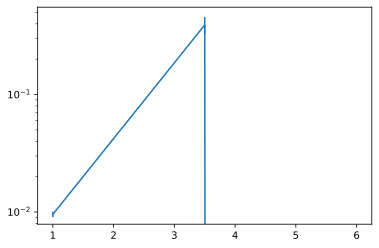

In [57]:
sigma = np.zeros(len(the_ap))
for i in range(len(the_ap)):
    sigma[i] = np.sqrt((N_jk-1)/N_jk*np.sum((s[i,:]-np.mean(s[i,:]))**2))
#print(np.mean(s[i,:])/sigma)
plt.errorbar(the_ap, np.mean(s, axis=1), yerr=sigma)
plt.yscale("log")

In [25]:
label = np.where(halo_mass>10**13.5)[0]
halov_los = np.cos(the)*halov[label,0]+np.sin(the)*halov[label,1]
the_ap = np.linspace(2,6, 10)
r_kSZ_rec = np.zeros(len(the_ap))
r_true_rec = np.zeros(len(the_ap))
s = np.zeros(len(the_ap))
for i in tqdm(range(len(the_ap))):
    
    kSZ_ap = convel_map2d_AP(field2d=momp_proj+cmb_map, the_ap=the_ap[i], grid=Grid, lscale=2*np.pi/Thelen)
    #x = [0,1,2];  y = [0,3]; z = [[1,2,3], [4,5,6]];, shape(z)=len(y), len(x)
    #f = interp2d(np.arange(Grid), np.arange(Grid-1), kSZ_ap[:-1,:], bounds_error=0, fill_value=0)
    #halo_kSZ = np.zeros((len(label)))
    #halo_v_rec = np.zeros((len(label)))
    halox_new = (proj1_halo_coor(halox[label],the)*Grid)%Grid

    halo_kSZ = interpn((np.arange(Grid), np.arange(Grid)), kSZ_ap, (halox_new[:,1], halox_new[:, 2]), bounds_error=0, fill_value=0)
    vx = interpn((np.arange(Grid),np.arange(Grid),np.arange(Grid)), velh_rsd_rec[:,:,:,0], halox[label,:]*Grid, bounds_error=0, fill_value=0)
    vy = interpn((np.arange(Grid),np.arange(Grid),np.arange(Grid)), velh_rsd_rec[:,:,:,1], halox[label,:]*Grid, bounds_error=0, fill_value=0)
    halo_v_rec = np.cos(the)*vx+np.sin(the)*vy
   
        
    #plt.plot(halo_kSZ, halov[label, 0], '.')

    a, b = halo_kSZ, halo_v_rec, 
    r_kSZ_rec[i] = np.mean(a*b)/np.std(a)/np.std(b)
    s[i] = np.sum(halo_kSZ*halo_v_rec)/np.sum(halo_v_rec**2)*np.std(halo_v_rec)

    a, b = halo_v_rec, halov_los
    r_true_rec[i] = np.mean(a*b)/np.std(a)/np.std(b)
    

100%|██████████| 10/10 [00:01<00:00,  5.78it/s]


In [12]:
label = np.where(halo_mass>10**13)[0]
halov_los = np.cos(the)*halov[label,0]+np.sin(the)*halov[label,1]
the_ap = np.linspace(2,6, 10)
r_kSZ_rec = np.zeros(len(the_ap))
r_true_rec = np.zeros(len(the_ap))
s = np.zeros(len(the_ap))
for i in tqdm(range(len(the_ap))):
    
    kSZ_ap = convel_map2d_AP(field2d=momp_proj+cmb_map, the_ap=the_ap[i], grid=Grid, lscale=2*np.pi/Thelen)
    #x = [0,1,2];  y = [0,3]; z = [[1,2,3], [4,5,6]];, shape(z)=len(y), len(x)
    f = interp2d(np.arange(Grid), np.arange(Grid-1), kSZ_ap[:-1,:], bounds_error=0, fill_value=0)
    halo_kSZ = np.zeros((len(label)))
    halo_v_rec = np.zeros((len(label)))
    halox_new = (proj1_halo_coor(halox[label],the)*Grid)%Grid

    for j in range(len(label)):
        halo_kSZ[j] = f(halox_new[j,2], halox_new[j, 1])
        vx = interpn((np.arange(Grid),np.arange(Grid),np.arange(Grid)), velh_rsd_rec[:,:,:,0], halox[label[j],:]*Grid, bounds_error=0, fill_value=0)
        vy = interpn((np.arange(Grid),np.arange(Grid),np.arange(Grid)), velh_rsd_rec[:,:,:,1], halox[label[j],:]*Grid, bounds_error=0, fill_value=0)
        #vx = interpn((np.arange(Grid),np.arange(Grid),np.arange(Grid)), velp[:,:,:,0], halox[label[j],:], bounds_error=0, fill_value=0)
        #vy = interpn((np.arange(Grid),np.arange(Grid),np.arange(Grid)), velp[:,:,:,0], halox[label[j],:], bounds_error=0, fill_value=0)
        halo_v_rec[j] = np.cos(the)*vx+np.sin(the)*vy
        #halo_v_rec[j] = vx
        
        
    #plt.plot(halo_kSZ, halov[label, 0], '.')

    a, b = halo_kSZ, halo_v_rec, 
    r_kSZ_rec[i] = np.mean(a*b)/np.std(a)/np.std(b)
    s[i] = np.sum(halo_kSZ*halo_v_rec)/np.sum(halo_v_rec**2)*np.std(halo_v_rec)

    a, b = halo_v_rec, halov_los
    r_true_rec[i] = np.mean(a*b)/np.std(a)/np.std(b)
    

100%|██████████| 10/10 [08:08<00:00, 48.82s/it]


In [24]:
halo_kSZ.shape, halo_v_rec.shape

((88401,), (6665,))

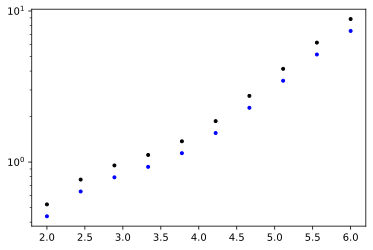

In [26]:
plt.plot(the_ap,s*np.pi*the_ap**2*10**6/r_true_rec, '.k')
plt.plot(the_ap,s*np.pi*the_ap**2*10**6, '.b')
plt.yscale("log")

In [105]:
#field_ap = convel_map2d_AP(field2d=np.sum(momp[:,:,:,0], axis=0), the_ap=3, grid=Grid, lscale=2*np.pi/Thelen)
f = interp2d(np.arange(Grid), np.arange(Grid), np.sum(velp[:,:,:,0], axis=0),)
halo_kSZ = np.zeros((len(label)))
for i in range(len(label)):
    halo_kSZ[i] = f(halox[label[i],2]*Grid, halox[label[i], 1]*Grid )

#plt.plot(halo_kSZ, halov[label, 0], '.')

a, b = halo_kSZ[:N], halov[label[:N], 0]
print(np.mean(a*b)/np.std(a)/np.std(b))

0.14377213187585533


In [119]:
N=8000
a, b = halo_kSZ[:N], halov[label[:N], 0]
print(np.mean(a*b)/np.std(a)/np.std(b))

0.1944091161418527


In [99]:
a, b = halo_kSZ, halov[label, 2]
print(np.mean(a*b)/np.std(a)/np.std(b))

0.0024886343611360455


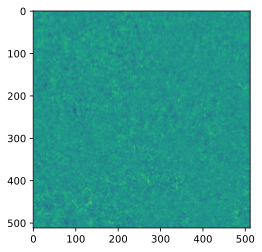

In [35]:
plt.imshow(momp_proj)

plt.imshow(cmb_map)

In [89]:
Thelen = Boxlen/h/cosmo.comoving_distance(z=snap_info.get_redshift(Snapshot)).value[0]
f_sky_factor = np.sqrt(1400/(Thelen*180/np.pi)**2)
f_sky_factor

2.0433046211084935

[[0.84861843 0.81484236 0.80530749 0.79747992 0.79389684 0.79196542
  0.78641324 0.78436228]
 [0.85308381 0.8526147  0.83830831 0.82771981 0.82262651 0.82029728
  0.81392596 0.81223288]
 [0.85688206 0.85621214 0.85781805 0.84421362 0.8378889  0.83511853
  0.82766169 0.8259746 ]
 [0.86061613 0.85982595 0.86149008 0.86111051 0.85318416 0.84976214
  0.84081168 0.        ]
 [0.86246463 0.86150057 0.86320112 0.8628297  0.86256502 0.85839818
  0.         0.        ]
 [0.86369909 0.86269524 0.86435663 0.8639491  0.8636813  0.86360835
  0.         0.        ]
 [0.86867053 0.86739934 0.8689359  0.86834706 0.867872   0.86777928
  0.         0.        ]
 [0.87094007 0.86944823 0.87091283 0.870229   0.86964981 0.86948334
  0.         0.        ]]


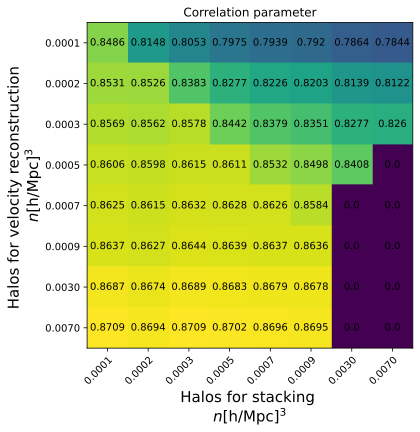

In [136]:
import os
n_halo =np.array([    1,     2,     3,     5,    7,     9,    30,   70])*10**-4 #8
lgM_min=np.array([12.86, 12.68, 12.55, 12.41, 12.3, 12.23, 11.82, 11.5])
den_method=0
vel_method=0
r  = np.zeros((len(lgM_min), len(lgM_min)))

Thelen = Boxlen/h/cosmo.comoving_distance(z=snap_info.get_redshift(Snapshot)).value[0]
f_sky_factor = np.sqrt(1400/(Thelen*180/np.pi)**2)

for i in [0,1,2,3,4,5,6,7]:
    for j in range(len(lgM_min)):
        filename = "stack_prediction_results/den"+str(den_method)+"vel"+str(vel_method)+"l"+str(i)+"l"+str(j)+".npz"
        if not os.path.exists(filename):
            continue
        d = np.load(filename)
        #print(filename)
        #r[i,j] = d["r_ksz_rec"][0]
        r[i,j] = d["r_true_rec"]


        
fig, ax = plt.subplots(figsize = (6,6))
im = ax.imshow(r, vmin=0.75) 
print(r)

label_nhalo = ["%.4f" % number for number in n_halo]
ax.set_xticks(np.arange(len(lgM_min)), labels=label_nhalo)
ax.set_yticks(np.arange(len(lgM_min)), labels=label_nhalo)

ax.set_ylabel("Halos for velocity reconstruction \n"+r"$n [\rm h/Mpc]^{3}$",fontsize=15)
ax.set_xlabel("Halos for stacking \n"+r"$n [\rm h/Mpc]^{3}$",fontsize=15)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(lgM_min)):
    for j in range(len(lgM_min)):
        text = ax.text(j, i, np.round(r[i,j], 4), ha="center", va="center", color="k")
        #print(SN[i, j], f_sky_factor, np.round(SN[i, j]*f_sky_factor, 1))

ax.set_title("Correlation parameter")

plt.show()

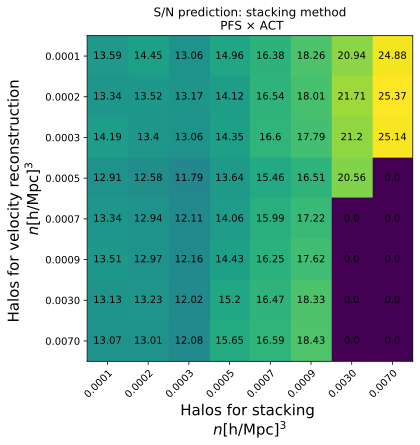

In [137]:
import os
n_halo =np.array([    1,     2,     3,     5,    7,     9,    30,   70])*10**-4 #8
lgM_min=np.array([12.86, 12.68, 12.55, 12.41, 12.3, 12.23, 11.82, 11.5])
den_method=0
vel_method=0
SN  = np.zeros((len(lgM_min), len(lgM_min)))

Thelen = Boxlen/h/cosmo.comoving_distance(z=snap_info.get_redshift(Snapshot)).value[0]
f_sky_factor = np.sqrt(1400/(Thelen*180/np.pi)**2)

for i in range(len(lgM_min)):
    for j in range(len(lgM_min)):
        filename = "stack_prediction_results/den"+str(den_method)+"vel"+str(vel_method)+"l"+str(i)+"l"+str(j)+".npz"
        if not os.path.exists(filename):
            continue
        d = np.load(filename)

        stack_signal = d["stack_signal"]
        stack_null = d["stack_null"]
        stack_mean, corv = error_esti_jackknife(stack_signal)
        C_ = pseudo_inverse(corv,2)
        chi_null = cal_chi_square(stack_mean, stack_mean, C_)
        SN[i, j] = np.sqrt(chi_null)

        
fig, ax = plt.subplots(figsize = (6,6))
im = ax.imshow(SN) 

label_nhalo = ["%.4f" % number for number in n_halo]
ax.set_xticks(np.arange(len(lgM_min)), labels=label_nhalo)
ax.set_yticks(np.arange(len(lgM_min)), labels=label_nhalo)

ax.set_ylabel("Halos for velocity reconstruction \n"+r"$n [\rm h/Mpc]^{3}$",fontsize=15)
ax.set_xlabel("Halos for stacking \n"+r"$n [\rm h/Mpc]^{3}$",fontsize=15)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(lgM_min)):
    for j in range(len(lgM_min)):
        text = ax.text(j, i, np.round(SN[i, j]*f_sky_factor, 2), ha="center", va="center", color="k")
        #print(SN[i, j], f_sky_factor, np.round(SN[i, j]*f_sky_factor, 1))

ax.set_title("S/N prediction: stacking method\n PFS "+r"$\times$ ACT")

plt.show()

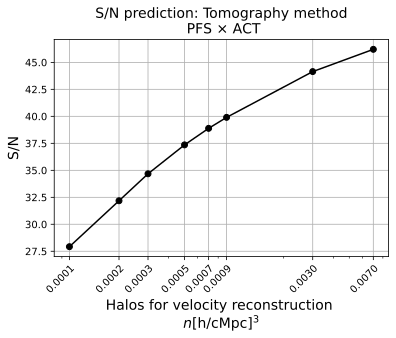

In [100]:
SN = np.zeros(len(lgM_min))
for i in range(len(lgM_min)):
    filename = "tomography_prediction_results/den"+str(den_method)+"vel"+str(vel_method)+"l"+str(i)+".npz"
    if not os.path.exists(filename):
            continue
    d = np.load(filename)
    SN[i] = d["SN"]
    
fig, ax = plt.subplots()
plt.plot(n_halo, SN, '-ok')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_xscale("log")
label_nhalo = ["%.4f" % number for number in n_halo]
ax.set_xticks(n_halo, labels=label_nhalo)
ax.set_xlabel("Halos for velocity reconstruction \n"+r"$n [\rm h/cMpc]^{3}$", fontsize=14)
ax.set_ylabel("S/N", fontsize=14)
ax.set_title("S/N prediction: Tomography method\n PFS "+r"$\times$ ACT", fontsize=14)
ax.grid()